In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import norm
import matplotlib.lines as lines

In [2]:
df = pd.read_csv("akinator IA3 - Feuille 4.csv")
pd.set_option("display.max.columns", None)
df

,Distance(m),Groupe 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Groupe 2,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Groupe 3,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Groupe 4,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Groupe 5,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Groupe 6,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Groupe 7,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,NaN,Lancer 1,Lancer 2,Lancer 3,Lancer 4,Lancer 5,Lancer 6,Lancer 1,Lancer 2,Lancer 3,Lancer 4,Lancer 5,Lancer 6,Lancer 1,Lancer 2,Lancer 3,Lancer 4,Lancer 5,Lancer 6,Lancer 1,Lancer 2,Lancer 3,Lancer 4,Lancer 5,Lancer 6,Lancer 1,Lancer 2,Lancer 3,Lancer 4,Lancer 5,Lancer 6,Lancer 1,Lancer 2,Lancer 3,Lancer 4,Lancer 5,Lancer 6,Lancer 1,Lancer 2,Lancer 3,Lancer 4,Lancer 5,Lancer 6
1,1.0,-25.0,"18,0",12.0,-11.0,1.5,12.0,-53.0,43.0,-50.0,0.5,55.0,-15.0,21.0,22.0,62.0,6.5,-13.0,-30.0,-27.0,31.0,-7.0,7.0,6.0,5.0,17.0,45.0,8.0,10.0,-6.0,-23.0,-44.0,54.0,-16.0,46.0,18.0,27.0,-10.0,-12.5,-19.5,24.0,-9.0,39.0
2,2.0,-3.0,7.0,42.0,-5.0,-12.0,-62.0,-28.0,11.0,-13.0,0.0,24.0,-1.0,11.0,5.0,-6.0,31.0,-24.0,-2.0,-49.0,50.0,-2.0,-58.0,-17.0,53.0,4.0,-15.0,10.0,45.0,-21.0,-60.0,-2.0,-13.0,19.0,-24.0,10.0,-6.0,-24.2,11.0,-3.0,-22.0,-0.5,7.5
3,4.0,-25.5,12.0,36.5,-36.0,-52.0,24.5,-7.0,-6.0,-22.0,-36.0,15.0,-75.0,150.0,49.0,-18.0,58.0,43.5,26.5,100.0,-95.0,21.0,76.0,43.0,51.0,37.5,-94.0,23.0,168.0,-26.0,-81.0,38.0,-62.0,-89.0,-48.0,170.0,-57.0,-10.0,-13.0,-17.0,-51.5,112.0,34.0
4,5.0,-78.0,-37.0,66.0,-84.5,-38.0,61.5,0.0,44.0,0.0,-21.5,42.0,-35.0,523.5,-77.5,-48.0,-56.0,4.0,626.0,17.0,91.0,49.0,66.0,59.0,121.0,-17.0,68.0,5.0,-7.0,47.0,-35.0,3.0,-37.0,-20.0,64.0,500.0,22.0,-73.5,-45.0,-97.5,90.0,-47.5,-117.5
5,6.0,-32.5,-270.0,-24.5,19.5,-24.0,-80.5,-44.0,-50.0,-24.0,73.0,70.0,-32.0,136.5,-95.5,-57.5,-102.0,-130.0,-32.0,-80.0,-35.0,14.0,133.0,-77.0,304.0,125.0,-87.0,-180.0,210.0,0.0,60.0,300.0,60.0,32.0,57.0,235.0,-39.0,-88.0,-194.5,-16.5,-130.0,-85.5,53.0


In [26]:
df2 = df.transpose()
df2.index = list(range(len(df2.index)))
df2.pop(0)
df2.rename(columns={3:4, 4:5, 5:6}, inplace = True)
df2 = df2.astype(str)
df2 = df2.applymap(lambda x: x.replace(",","."))
df2 = df2.astype(float)
df2 = df2.drop(0)
df2

,1,2,4,5,6
1,-25.0,-3.0,-25.5,-78.0,-32.5
2,18.0,7.0,12.0,-37.0,-270.0
3,12.0,42.0,36.5,66.0,-24.5
4,-11.0,-5.0,-36.0,-84.5,19.5
5,1.5,-12.0,-52.0,-38.0,-24.0
6,12.0,-62.0,24.5,61.5,-80.5
7,-53.0,-28.0,-7.0,0.0,-44.0
8,43.0,11.0,-6.0,44.0,-50.0
9,-50.0,-13.0,-22.0,0.0,-24.0
10,0.5,0.0,-36.0,-21.5,73.0


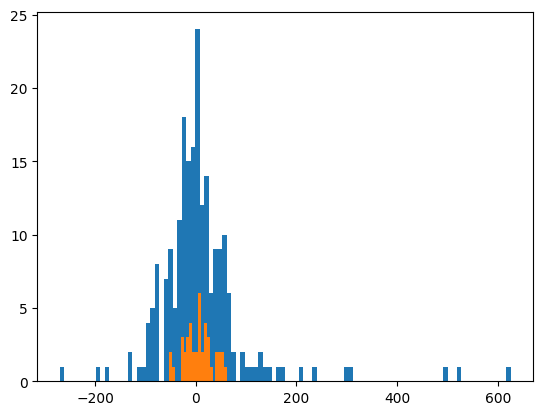

In [6]:
df_total = df2.stack()
df_total = pd.DataFrame(df_total)
plt.hist(df_total, bins = 100);
my_bins = 20
plt.hist(df2[1], bins = my_bins);

In [29]:
m1 = df2[1]

In [30]:
m1_mean = m1.mean()
print(m1_mean)
m1_std = m1.std()
print(m1_std)
m1_ste = m1_std / np.sqrt(len(df2))
print(m1_ste)

5.226190476190476
28.148171188038603
4.343357109620793


In [12]:
sigma = 55.61843504566346
mean = 3.9680952380952377

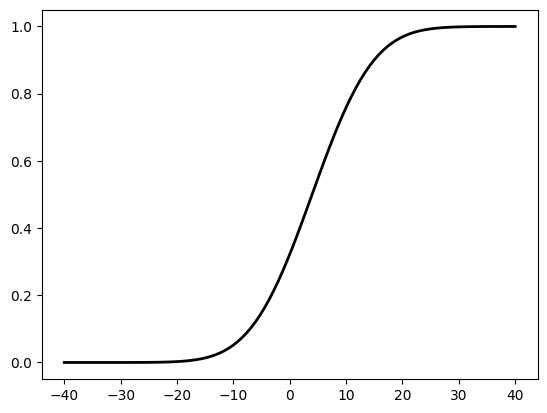

In [20]:
N = len(df2)
#plt.hist(m1, bins = my_bins)

x = np.linspace(-40, 40, 100)
p = norm.cdf(x, mean, sigma / np.sqrt(42))
plt.plot(x, p, 'k', linewidth=2);


42